# Problem Statement

**Solve a 2D steady state heat conduction where Diffusion coefficient is 1 m^2/sec.**


\begin{align}
\phi(x,y) = xy
\end{align}

\begin{align}
\nabla \cdot   ({\nabla k \phi}) & = 0          \;\;\;\; 0\le x \le 1
\end{align}


\begin{align}
\nabla^2  {\phi} & = 0          \;\;\;\; 0\le x \le 1
\end{align}


Given Boundary Conditions are


\begin{align}
\phi(0,y) = 0 \;\;\;\;\phi(1,y) = y \\
\phi(x,0) = 0 \;\;\;\;\phi(x,1) = x
\end{align}


\begin{align}
\frac{\partial^2{\phi}}{\partial x^2} &+ \frac{\partial^2{\phi}}{\partial^2y} = 0; \;\;\; k=1
\end{align}

After aplying the central differencing scheme which is second order acurate. The equation deduces as 

\begin{align}
\frac{\phi_{i+1,j} -2\phi_{i,j}+ \phi_{i-1,j}}{\Delta x^2} + \frac{\phi_{i,j+1} - 2\phi_{i,j} + \phi_{i,j-1}}{\Delta y^2} &= 0
\end{align}








# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Parameters

Create a node centered grid of size 50 cells plus one and define the boundaries conditions of the flow.

In [25]:
x_min,x_max = 0., 1.
y_min,y_max = 0., 1.
nx,ny = 100,100         #no of cells

x_coords,dx = np.linspace(x_min,x_max, nx+1, retstep = True)
y_coords,dx = np.linspace(y_min,y_max, ny+1, retstep = True)

K = 1.0 #diffusion Coefficient
ϕ = np.zeros([ny+1,nx+1]) #Intialize the soultions with zeros

# Boundary Conditions


In [26]:
#Right boundary 
for j in range(ny+1):
    ϕ[j,-1] = y_coords[j]

#Top boundary
for i in range(nx+1):
    ϕ[-1,i] = x_coords[i] 

# Jacobi Method

\begin{align}
\phi^{k+1}_{i,j} = \frac{1}{2\left [\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2} \right] } &  \left\{\frac{\phi^{k}_{i+1,j} + \phi^{k}_{i-1,j}}{\Delta x^2} + \frac{\phi^{k}_{i,j+1} + \phi^{k}_{i,j+1}}{\Delta y^2} \right\}
\end{align}



*****
In this method, the dependent variable phi is calculateed with the help of intial guessed values and neighbouring points and previous value of the iteration. It continued till the specified convergence met. In general O(N^2) values are atleast required for Jacobi method for 1D case. 
*****

In [27]:
ϕ_old = ϕ.copy()
ϕ_jacobi = ϕ.copy()

In [28]:
for k in range(1000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_jacobi[j,i] = 0.25*(ϕ_old[j,i+1]+ϕ_old[j,i-1]+ϕ_old[j+1,i]+ϕ_old[j-1,i])
    ϕ_old = ϕ_jacobi

# Visulaization

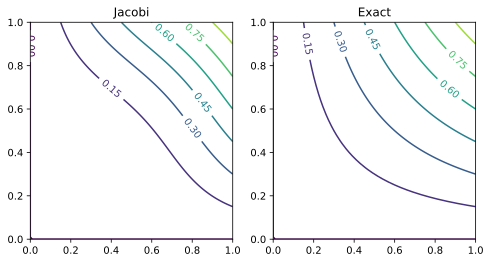

In [29]:
ϕ_exact = np.zeros_like(ϕ) #Intilize an exact solution which has the same size of numerical solution
X,Y = np.meshgrid(x_coords,y_coords) 
ϕ_exact = X*Y

fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
cs = plt.contour(X,Y,ϕ_jacobi)
plt.clabel(cs)
plt.title('Jacobi')

plt.subplot(1,2,2)
cs = plt.contour(X,Y,ϕ_exact)
plt.clabel(cs)
plt.title('Exact')
plt.show()

# Gauss Seidel


\begin{align}
\phi^{k+1}_{i,j} = \frac{1}{2\left [\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2} \right] } &  \left\{\frac{\phi^{k}_{i+1,j} + \phi^{k+1}_{i-1,j}}{\Delta x^2} + \frac{\phi^{k}_{i,j+1} + \phi^{k+1}_{i,j-1}}{\Delta y^2} \right\}
\end{align}

In [30]:
ϕ_gauss = ϕ.copy()

for k in range(1000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_gauss[j,i] = 0.25*(ϕ_gauss[j,i+1]+ϕ_gauss[j,i-1]+ϕ_gauss[j+1,i]+ϕ_gauss[j-1,i])
    

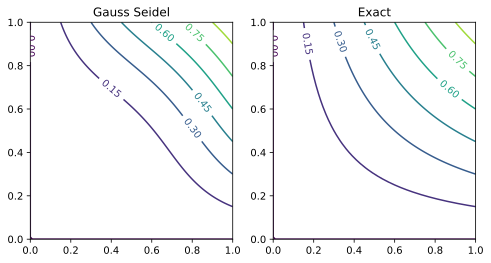

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
cs = plt.contour(X,Y,ϕ_gauss)
plt.clabel(cs)
plt.title('Gauss Seidel')

plt.subplot(1,2,2)
cs = plt.contour(X,Y,ϕ_exact)
plt.clabel(cs)
plt.title('Exact')
plt.show()

## SOR


\begin{align}
\phi^{k+1}_{i,j} = \phi^{k}_{i,j} +\omega * \phi^{*}_{ij} ; \;\;\;\;  \phi^{*}_{ij} = \text{Gauss Seidel} (\phi_{ij})
\end{align}

Since Δx = Δy = 0.02, then the equation reduced to 

\begin{align}
\phi^{k+1}_{i,j} = \phi^{k}_{i,j} +\omega * \left\{\frac{\phi^{k}_{i+1,j} + \phi^{k+1}_{i-1,j}+ \phi^{k}_{i,j+1} + \phi^{k+1}_{i,j-1} - \phi^{k}_{i,j} }{4} \right\} \newline
\end{align}

\begin{align}
\phi^{k+1}_{i,j} = (1-\omega)\phi^{k}_{i,j} +\omega * \phi^{*}_{ij} ;
\end{align}

In [32]:
ϕ_SOR = ϕ.copy()
Ω = 1.1

for k in range(1000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_SOR[j,i] = (1-Ω)*ϕ_SOR[j,i] + Ω*0.25*(ϕ_SOR[j,i+1]+ϕ_SOR[j,i-1]+ϕ_SOR[j+1,i]+ϕ_SOR[j-1,i])

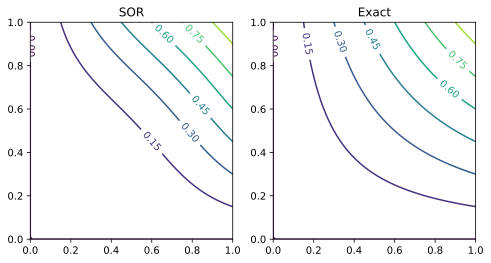

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
cs = plt.contour(X,Y,ϕ_SOR)
plt.clabel(cs)
plt.title('SOR')

plt.subplot(1,2,2)
cs = plt.contour(X,Y,ϕ_exact)
plt.clabel(cs)
plt.title('Exact')
plt.show()

# Error Comparison

In [ ]:
#L1 Norm

ϵ_jacobi = 0.0
ϵ_gauss = 0.0
ϵ_sor = 0.0

for j in range(1,ny+1):
    for i in range(1,nx+1):
        ϵ_jacobi += (ϕ_jacobi[j,i]-ϕ_exact[j,i]).
        ϵ_gauss += (ϕ_gauss[j,i]-ϕ_exact[j,i]).
        ϵ_sor += (ϕ_SOR[j,i]-ϕ_exact[j,i]).
        
print(f'Jacobi : {(ϵ_jacobi)}')
print(f'Gauss : {(ϵ_gauss)}')
print(f'SOR : {(ϵ_sor)}')

In [34]:
#L2 Norm

ϵ_jacobi = 0.0
ϵ_gauss = 0.0
ϵ_sor = 0.0

for j in range(1,ny+1):
    for i in range(1,nx+1):
        ϵ_jacobi += (ϕ_jacobi[j,i]-ϕ_exact[j,i])**2.
        ϵ_gauss += (ϕ_gauss[j,i]-ϕ_exact[j,i])**2.
        ϵ_sor += (ϕ_SOR[j,i]-ϕ_exact[j,i])**2.
        
print(f'Jacobi : {np.sqrt(ϵ_jacobi)}')
print(f'Gauss : {np.sqrt(ϵ_gauss)}')
print(f'SOR : {np.sqrt(ϵ_sor)}')

Jacobi : 7.829941003337332
Gauss : 7.827986767584582
SOR : 6.290080454873053
